# The CIFAR-'110':
## Image Superclass & Subclass Classification
   
> ### Final Capstone Project
> ### John A. Fonte
> __May 2019 <br>
[Github](https://github.com/jafonte01)__

# Table of Contents

1. __Introduction__
    - Significance of Research
    - Statement of Problem to be Solved
    - Explanation of Dataset
<br><br>
2. __Image Data Loading__
    - Pixel-to-Dimension Array Transposition and additional cleaning/transformations
    - Data batch load compilation, data class balancing
    - DataFrame setup
    - train/test split, data shuffling
<br><br>
2. __Data Exploration__
    - Visualization of Sample Datapoints
<br><br>
3. __Data Preparation for Modeling__
    - Dimensionality reduction
    - Use MLP Classifier to demonstrate dimensionality reduction effect
<br><br>
4. __Unsupervised Learning__
    - Spectral Clustering
    - t-SNE modeling and comparison to PCA results
<br><br>
5. __Supervised Modeling__
    - Scaling introduced into modeling pipeline if not already done in Part 3
    - Inclusion & Application of Autoencoding
    - MLP Classifier
    - Random Forest
    - Recurrent Neural Network
    - Convolutional Neural Networks
<br><br>
6. __Conclusion__
    - Final Analysis & Recommendations

---
---
# 1. Introduction

### Significance of Research
Object detection, identification, and classification is an ever-growing task in the computer science industry. The applications of the inter-disciplinary field of so-called "computer vision" range from facial recognition to handwriting detection to automating censoring and redaction, not to mention the applicability of accurately indexing the innumerable amount of images on the internet.

It is therefore of the utmost importance to create machine learning models that not only accurately classify objects, but to do so with optimized efficiency. This project aims to determine which models achieve these two goals of accuracy and efficiency.

__STATEMENT OF PROBLEM:__

Which machine learning model provides the best accuracy/performance trade-off when classifying objects?

---

### Explanation of Original Datasets: CIFAR-10 and CIFAR 100

The image dataset to be used here is a concatenation of two datasets: the _CIFAR-10_ and _CIFAR-100_. Both of these datasets are one compiled from the Canadian Institute for Advanced Research, with the help of the University of Toronto's Computer Science Department. CIFAR-10 is a 10-class image dataset - four classes being vehicles (airplane, automobile, ship, truck), and six animals (bird, cat, deer, dog, frog, horse). CIFAR-100 is a 100-class image dataset, with 20 classes being classified under 1 of 20 "superclasses." CIFAR-10 contains 50000 training images and 10000 testing images, with a total of 6000 images per class. The CIFAR-100 dataset is the same size, thus a total of 600 images per class.

### Explanation of this Dataset: "CIFAR-110"

CIFAR-110 is the concatenation of these two datasets. However, because CIFAR-10 classes are 10x larger than those in CIFAR-100, the ten CIFAR-10 classes __will be cut down to 600 images each__ before being concatenated with the CIFAR-100 data. Moreover, because the CIFAR-10 data does not have superclasses, the ten classes will be manually assigned a superclass. __Here, 5 out of the 20 superclasses will be assigned 2 additional image classes.__ This slightly imbalances the class space within these 20 superclasses (as 5 superclasses will have 7 classes, while the remaining 15 superclasses will have only 5 classes). While this is an express bias to be taken into account, it is hypothesized that it will have a negligible effect on the accuracy of superclass classification.

Training and testing dataset splitting will be retained. Furthermore, __CIFAR-10 will be kept as a separate dataset__ to compare machine learning model results between low class and high class image datasets.

### Explanation of the Data

Each image is in a 32 x 32 pixel format with RGB coloring (32 x 32 x (R-channelvalue + G-channelvalue + B-channelvalue) = 3072 values total). Each pixel color-channel-value ranges from 0 (darkest) to 255 (brightest). With great thanks to CIFAR, the images are all uniform 32 x 32 size. This means that _necessary_ reshaping and other transformations do not need to be done; HOWEVER, data array reshaping, as well as other non-necessary image adjustements (e.g., resolution adjustments) will be done.

---
---
# 2. Loading Data

Loading data is done from local machine. You _could_ cheat and do `from keras.datasets import cifar100 ... cifar100.load_data`, but explaining the steps of loading will be more important for purposes of creating CIFAR-110.

In [62]:
# basic imports to start

from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Image & Data Loading imports
import pickle
import PIL

# other imports (i.e., sklearn imports and keras layers) will be done ad hoc

In [26]:
# setting pandas parameters for easily visualization

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 150)

In [18]:
# Importing image data as dict

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [19]:
# loading image data

# I *could* do a list.dir() loop, 
# but with only 6 batch files to load, this is easier.

batch1 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/data_batch_1')
batch2 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/data_batch_2')
batch3 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/data_batch_3')
batch4 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/data_batch_4')
batch5 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/data_batch_5')

batch_test = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/test_batch')

In [96]:
# loading cifar 100 image data
batch100train = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-100-python/train')
batch100test = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-100-python/test')

In [98]:
'''
The relevant keys in these dictionaries 
for BOTH CIFAR-10 and CIFAR-100 are: 
1. b'labels' = target variable labels for each of the images 
2. b'data'   = numpy array of the 3072 values per image
'''
print(batch1.keys())

'''
CIFAR-100 splits 'labels' into two keys:
1. b'coarse_labels' = superclass labels
2. b'fine_labels'   = normal class labels
'''
batch100train.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

## Next Steps for Data Setup

To create CIFAR-110 _and_ retain CIFAR-10 for comparison analysis, we need to do the following:
<br>
1. __Combine CIFAR-10 data batches__
   - Done through `np.concatenate`
<br><br>
2. __Set CIFAR-10 combined training batch as a DataFrame and testing batch as second DataFrame__
   - These DataFrames are saved for CIFAR-10 analysis
<br><br>
3. __Basic DataFrame Adjustments__
   - Create target variable names based on labels
   - Transpose 1D numpy arrays into pixel-representation arrays
<br><br>
4. __Create training and testing DataFrame subsets__
   - CIFAR-10 training and testing DataFrames will be kept for comparison analysis
   - Subsets will need to be 10% of data per class to maintain class and size balancing
   - datapoints for each class will need to be shuffled to yield a non-biased class subset
<br><br>
5. __Manually add Superclass feature to CIFAR-10 subset data__
<br><br>
6. __Create CIFAR-100 DataFrame__
   - Same Process as Steps 2 and 3 above
<br><br>
7. __Concatenate subset DataFrames with CIFAR-100 to create CIFAR-110__

---
### 2.1 - 2.3. Setting up DataFrames

Image data works off of numpy arrays, not pandas DataFrames. However, for simplicity and organizational purposes, we can maintain the arrays in a DataFrame format. In my humble opinion, inputting a labeled DataFrame column is clearer and more intuitive than np.array\[datapoint index\]\[datapoint label index\].

In [100]:
'''
Checking if each batch has equal amounts of each class in them.
If it does have an equal amount, 
we can cut down the data by class more easily.
'''

from collections import Counter

batch1list = batch1.get(b'labels')
batch2list = batch2.get(b'labels')

print(Counter(batch1list).keys())   # equivalent to list(set(batch1list))
print(Counter(batch1list).values()) # counts the frequency of each key element

print(Counter(batch2list).keys())  
print(Counter(batch2list).values())

# it looks like it is not evenly distributed,
# so we will have to concatenate first, then sift through it
# (The test batch is good though)

dict_keys([6, 9, 4, 1, 2, 7, 8, 3, 5, 0])
dict_values([1030, 981, 999, 974, 1032, 1001, 1025, 1016, 937, 1005])
dict_keys([1, 6, 8, 3, 4, 0, 5, 2, 7, 9])
dict_values([1007, 1008, 987, 995, 1010, 984, 988, 1010, 1026, 985])


In [113]:
# 2.1-2.2 Data Batch Concatentation and DataFrame setup

concat_data = np.concatenate((batch1.get(b'data'), batch2.get(b'data'), 
                              batch3.get(b'data'), batch4.get(b'data'), batch5.get(b'data')), 
                             axis=0)

concat_labels = np.concatenate((batch1.get(b'labels'), batch2.get(b'labels'), 
                              batch3.get(b'labels'), batch4.get(b'labels'), batch5.get(b'labels')), 
                             axis=0)

dfcifar10_train = pd.DataFrame({'1D Pixel Arrays':pd.Series([i for i in concat_data]),
                                'Target Labels':pd.Series(concat_labels)})

dfcifar10_test = pd.DataFrame({'1D Pixel Arrays':pd.Series([i for i in batch_test.get(b'data')]),
                              'Target Labels':pd.Series(batch_test.get(b'labels'))})


In [115]:
# sample dataframe output
dfcifar10_train.head(2)

,1D Pixel Arrays,Target Labels
0,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, 131, 125, 142, 144, 137, 129, 137, 134, 124, 139, 139, 133, 136, 139, 152, 163, 168, 159, 158, 158, ...",6
1,"[154, 126, 105, 102, 125, 155, 172, 180, 142, 111, 106, 109, 123, 127, 181, 217, 209, 166, 164, 158, 116, 102, 95, 90, 72, 60, 56, 77, 94, 91, 87,...",9


In [152]:
meta10 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-10-batches-py/batches.meta')
meta10

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [120]:
# 2.3 DataFrame data transformations
# Adding real labels to dfcifar_train Target Labels
# the numbering matches up with the labels ordered on the dataset website (and shown above)
'''
(Note: I discovered the meta files until *after* I created these mapping functions. 
Had I known, I wouldn't have wasted my time hand-writing out every class name!)
'''

def cifar10_target_label_mapping(target_label_list):
    final_label_list = []
    labeldict = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog',
                6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}
    
    for label in target_label_list:
        final_label_list.append(labeldict.get(label))
        
    return final_label_list

# applying to datasets
dfcifar10_train['Target Names'] = pd.Series(cifar10_target_label_mapping(dfcifar10_train['Target Labels']))
dfcifar10_test['Target Names'] = pd.Series(cifar10_target_label_mapping(dfcifar10_test['Target Labels']))

##### 2.3 Array Transposition 

The shape of original arrays in the CIFAR dataset are 1-dimension. Such an array shape is inappropriate for Python image libraries, which require: (Width, Height, (Number of Color channels or "1")).

Specifically here, the first 1024 values of the 1-dimensional array are red-channel values, the second 1024 green-channel values, and the last 1024 blue-channel values. We are able to use the numpy method `.transpose([x,y,z])` to reshape these values accordingly.

In [95]:
# single sample image pixel array to exemplify 1-dimensionality of original data

samplearray = batch1.get(b'data')[1]
samplearray[:50]

array([154, 126, 105, 102, 125, 155, 172, 180, 142, 111, 106, 109, 123,
       127, 181, 217, 209, 166, 164, 158, 116, 102,  95,  90,  72,  60,
        56,  77,  94,  91,  87,  79, 140, 145, 125, 124, 150, 152, 174,
       178, 134, 110, 133, 163, 192, 218, 240, 245, 241, 238], dtype=uint8)

In [121]:
# Reshaping Input Array Data

def array_to_pixel_dimensionality_transposition(numarr):
    transposed_list = []
    
    for singlearray in numarr:
        singletransposed = singlearray.reshape(3,32,32).transpose([1, 2, 0])
        transposed_list.append(singletransposed)
        
    return transposed_list

# applying to datasets
dfcifar10_train['Image Array'] = pd.Series(array_to_pixel_dimensionality_transposition(dfcifar10_train['1D Pixel Arrays']))
dfcifar10_test['Image Array'] = pd.Series(array_to_pixel_dimensionality_transposition(dfcifar10_test['1D Pixel Arrays']))

In [122]:
# brief check to see adjustment to DataFrames
dfcifar10_train.head(2)

,1D Pixel Arrays,Target Labels,Target Names,Image Array
0,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, 131, 125, 142, 144, 137, 129, 137, 134, 124, 139, 139, 133, 136, 139, 152, 163, 168, 159, 158, 158, ...",6,Frog,"[[[59, 62, 63], [43, 46, 45], [50, 48, 43], [68, 54, 42], [98, 73, 52], [119, 91, 63], [139, 107, 75], [145, 110, 80], [149, 117, 89], [149, 120, ..."
1,"[154, 126, 105, 102, 125, 155, 172, 180, 142, 111, 106, 109, 123, 127, 181, 217, 209, 166, 164, 158, 116, 102, 95, 90, 72, 60, 56, 77, 94, 91, 87,...",9,Truck,"[[[154, 177, 187], [126, 137, 136], [105, 104, 95], [102, 101, 99], [125, 131, 139], [155, 166, 180], [172, 190, 210], [180, 199, 214], [142, 156,..."


In [123]:
# brief check for array shape
dfcifar10_train['Image Array'][1].shape

(32, 32, 3)

This is a sample image of a Ship


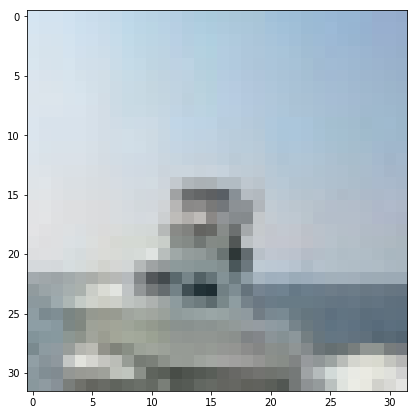

In [128]:
# check to see if "Image Array" data actually corresponds to Image parameters

plt.figure(figsize=(7,7))
print('This is a sample image of a', dfcifar10_train['Target Names'][100])
plt.imshow(dfcifar10_train['Image Array'][100])
plt.show()

__Note:__ We will not scale or transform the images at this time. The focus is on creating the four datasets: <br> 
dfcifar10_train, dfcifar10_test, dfcifar110_train, dfcifar110_test.

---
### 2.4-2.5 DataFrame Subset and Transfer
To create dfcifar110, we need to take a subset of _each_ class with the length of that found in each class in CIFAR100 (to maintain balancing). In other words, the subset will be 10% of each class in dfcifar10_train and dfcifar10_test.

There, we will add a new target variable - the "superclass" found in CIFAR-100 but not in CIFAR-10 - to the dfcifar10 train and test subsets.

Before we concatenate this data with dfcifar100, we need to have the features match exactly. Therefore, we need to create columns for Target Names and Image Arrays. Also as a technical but important point, we need to account for the class labels overlapping with that found in dfcifar. We will have to adjust the labels to make sure all classes are distinct.

In [130]:
# creating subset function
def CIFAR10_balancedsubset(df, targetvariablelist):
    
    dfbalancedsubset = pd.DataFrame(columns=list(dfcifar10_train.columns))
    
    for targetclass in targetvariablelist.unique():             
        subclass = df[targetvariablelist == targetclass].copy() # I personally use .copy() 
                                                                # all the time to avoid weird errors!!!!!
        #creating subclass via df.sample()    
        subclass = subclass.sample(frac=0.1, random_state=44)   # df.sample automatically shuffles the data for sampling!
        dfbalancedsubset = pd.concat([dfbalancedsubset, subclass])
                      
    return dfbalancedsubset                                                       

In [131]:
# applying function to dataframes
df10trainsubset = CIFAR10_balancedsubset(dfcifar10_train, dfcifar10_train['Target Names'])
df10testsubset = CIFAR10_balancedsubset(dfcifar10_test, dfcifar10_test['Target Names'])

In [132]:
# length check
df10trainsubset.shape # cut 5000 images per class down to 500 images per class to match dfcifar100

(5000, 4)

In [135]:
# 2.5 Superclass datacolumn addition:

def CIFAR10_superclass_mapping(target_label_list):
    
    final_label_list = []
    final_label_num_list = []
    
    # I don't think I can do this any other way but manually...
    
    labeldict = {0:'Vehicles 1', 1:'Vehicles 2', 2:'Reptiles', 3:'Medium-Sized Mammals', 
                 4:'Large Omnivores & Herbivores', 5:'Medium-Sized Mammals',
                6:'Reptiles', 7:'Large Omnivores & Herbivores', 8:'Vehicles 1', 9:'Vehicles 2'}
    
    # These Numeric Superclass values taken from original dataset
    labelnumdict = {'Vehicles1':18, 'Vehicles2':19, 'Reptiles':15, 
                    'Large Omnivores & Herbivores':11, 'Medium-Sized Mammals':12}
    
    for label in target_label_list:
        target_label = labeldict.get(label)
        
        final_label_list.append(target_label)
        final_label_num_list.append(labelnumdict.get(target_label))
        
        # outputs TWO Lists (to be convereted into Pandas Series and added to respective dataframes)
    return final_label_list, final_label_num_list


In [136]:
# applying function to subset df's - again, generating two data columns

df10trainsubset['Superclass Name'], df10trainsubset['Class Label'] = CIFAR10_superclass_mapping(df10trainsubset['Target Labels'])
df10testsubset['Superclass Name'], df10testsubset['Class Label'] = CIFAR10_superclass_mapping(df10testsubset['Target Labels'])

### 2.6 Creating the CIFAR-100 DataFrames

We will repeat the same DataFrame creation steps for CIFAR-100. Doing this ensures the shape and characteristics of the CIFAR-100 DataFrame match up perfectly to those in the CIFAR-10 datasets. The reason why this is so important is for the concatenation step between the two DataFrames via `pd.concat`; if the shapes and characteristics are not exact, an error will be thrown.

In [137]:
# checking the characteristics to import
print(batch100train.keys())
print(batch100test.keys())

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])


In [139]:
# realized I went a little out of order creating superclass names when there are none!
# gotta set this up for CIFAR-100 input data ***before*** concatenation

'''
NOTE: 
I realized I could've created a second argument called ['a', 'b', 'c'] and compiled all the mapping
into one function, with "if 'b'", map label names, "if 'c'", map superclases, etc.
...but the code is already there. There's no performance lost by creating a new function, 
so I'm leaving it.
'''
#------------------------------------------------------------------

def CIFAR100_superclass_mapping(target_label_list):
    
    final_label_list = []
    
    # I don't think I can do this any other way but manually...again...
    # tried to carry over as much as I could though!
    
    labeldict = {18:'Vehicles 1', 19:'Vehicles 2', 15:'Reptiles', 12:'Medium-Sized Mammals', 
                 11:'Large Omnivores & Herbivores', 5:'Household Electronic Devices',
                6:'Household Furniture', 7:'Insects', 8:'Large Carnivores', 9:'Large Man-Made Outdoor Things',
                0:'Aquatic Mammals', 1:'Fish', 2:'Flowers', 3:'Food Containers', 4:'Fruits & Vegetables',
                10:'Large Natural Outdoor Scenes', 13:'Non-Insect Vertebrates', 14:'People', 16:'Small Mammals',
                17:'Trees'}
    
    for label in target_label_list:
        target_label = labeldict.get(label)
        
        final_label_list.append(target_label)
        
        # outputs TWO Lists (to be convereted into Pandas Series and added to respective dataframes)
    return final_label_list

In [141]:
# applying function

batch100traincoarselabellist = CIFAR100_superclass_mapping(batch100train.get(b'coarse_labels'))
batch100testcoarselabellist = CIFAR100_superclass_mapping(batch100test.get(b'coarse_labels'))

In [175]:
# creating DataFrames
'''
You will see I added '10' to the Target Label values. 
This was to ensure that there was no overlap in classification labels when adding 10 new classes labeled 0 to 9.
'''

dfcifar100_train = pd.DataFrame({'1D Pixel Arrays':pd.Series([i for i in batch100train.get(b'data')]),
                                'Target Labels':pd.Series([i+10 for i in batch100train.get(b'fine_labels')]),
                               'Superclass Name': pd.Series(batch100traincoarselabellist)})

dfcifar100_test = pd.DataFrame({'1D Pixel Arrays':pd.Series([i for i in batch100test.get(b'data')]),
                              'Target Labels':pd.Series([i+10 for i in batch100test.get(b'fine_labels')]),
                              'Superclass Name': pd.Series(batch100testcoarselabellist)})

In [176]:
# adding final datacolumn: transpositioned arrays

dfcifar100_train['Image Array'] = pd.Series(array_to_pixel_dimensionality_transposition(dfcifar100_train['1D Pixel Arrays']))
dfcifar100_test['Image Array'] = pd.Series(array_to_pixel_dimensionality_transposition(dfcifar100_test['1D Pixel Arrays']))

In [177]:
list(dfcifar100_train.columns)

['1D Pixel Arrays', 'Target Labels', 'Superclass Name', 'Image Array']

In [178]:
meta100 = unpickle('D:/Github/Data-Science-Bootcamp/CAPSTONE - FINAL/cifar-100-python/meta')
print(meta100.keys())
meta100.get(b'fine_label_names')[:10]

dict_keys([b'fine_label_names', b'coarse_label_names'])


[b'apple',
 b'aquarium_fish',
 b'baby',
 b'bear',
 b'beaver',
 b'bed',
 b'bee',
 b'beetle',
 b'bicycle',
 b'bottle']

In [179]:
# mapping Target Names to Target Labels
# Note - however, that the superclass labels are in order, 
# so the functions are an accurate representation of that

targetnames = list(meta100.get(b'fine_label_names'))
targetnameappend = []

for i in dfcifar100_train['Target Labels']:
    i = i - 10 # gotta fix that again for this loop!
    labelname = targetnames[i]
    targetnameappend.append(labelname)

dfcifar100_train['Target Names'] = pd.Series(targetnameappend)

In [180]:
# doing same for cifar100test
targetnameappend = []

for i in dfcifar100_test['Target Labels']:
    i = i - 10 # gotta fix that again for this loop!
    labelname = targetnames[i]
    targetnameappend.append(labelname)

dfcifar100_test['Target Names'] = pd.Series(targetnameappend)

### 2.7 CIFAR-101 DataFrame Creation

In [181]:
# for the grand finale: CIFAR10 and CIFAR100 concatenation
# again, have to make sure the columns match up

print(dfcifar100_train.columns)
print(df10trainsubset.columns)

Index(['1D Pixel Arrays', 'Target Labels', 'Superclass Name', 'Image Array',
       'Target Names'],
      dtype='object')
Index(['1D Pixel Arrays', 'Target Labels', 'Target Names', 'Image Array',
       'Superclass Name', 'Class Label'],
      dtype='object')


In [184]:
print(batch100test.keys())
print(batch100test.get(b'batch_label')[5:20])

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])
b'ng batch 1 of 1'


In [185]:
# one final data column to add: class label

dfcifar100_train['Class Label'] = pd.Series(batch100train.get(b'coarse_labels'))
dfcifar100_test['Class Label'] = pd.Series(batch100test.get(b'coarse_labels'))

In [189]:
# Let's concat!

df101train = pd.concat([dfcifar100_train, df10trainsubset], axis=0, sort=True, ignore_index=True).reset_index()
df101test = pd.concat([dfcifar100_test, df10testsubset], axis=0, sort=True, ignore_index=True).reset_index()

In [190]:
df101train.head(2)

,index,1D Pixel Arrays,Class Label,Image Array,Superclass Name,Target Labels,Target Names
0,0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 231, 176, 237, 255, 255, 255, 255, 255, 252, 242, 229, ...",11.0,"[[[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 25...",Large Omnivores & Herbivores,29,b'cattle'
1,1,"[255, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, ...",15.0,"[[[255, 255, 255], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 25...",Reptiles,39,b'dinosaur'


In [202]:
# some points of data cleaning

# I'm not sure how that index column got there...

# (commented out because I already dropped it)
#df101train.drop(columns='index', inplace=True) 
#df101test.drop(columns='index', inplace=True)

# Cleaning the Target Names - Making it Look Pretty
import re

def label_cleaner(labellist):
    for name in labellist:
        name = name.decode("utf-8") # originally in "bytes" datatype - could not do string cleaning that way
        name = re.sub('b\'', '', name)
        name = re.sub('\'', '', name)
        name = name.capitalize()
        
        return name

# apply to data column
df101train['Target Names'] = label_cleaner(df101train['Target Names'])
df101test['Target Names'] = label_cleaner(df101test['Target Names'])

In [198]:
# another data cleaning point - reordering columns
# easiest way to do this is to overwrite the dataframe variable

df101train = df101train[['1D Pixel Arrays', 'Image Array', 'Target Names', 
                         'Target Labels', 'Superclass Name', 'Class Label']].copy()
df101test = df101test[['1D Pixel Arrays', 'Image Array', 'Target Names', 
                         'Target Labels', 'Superclass Name', 'Class Label']].copy()

# redoing stupid names

df101train.rename(columns={'Target Labels':'Target Num', 'Class Label': 'Superclass Num'}, inplace=True)
df101test.rename(columns={'Target Labels':'Target Num', 'Class Label': 'Superclass Num'}, inplace=True)

In [204]:
df101train.head(2)

,1D Pixel Arrays,Image Array,Target Names,Target Num,Superclass Name,Superclass Num
0,"[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 231, 176, 237, 255, 255, 255, 255, 255, 252, 242, 229, ...","[[[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 25...",Cattle,29,Large Omnivores & Herbivores,11.0
1,"[255, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 252, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, ...","[[[255, 255, 255], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 253, 253], [253, 25...",Cattle,39,Reptiles,15.0


In [205]:
# As a final data cleaning thing, we are going to shuffle ALL datasets to minimize any 
# bias from the order of the datapoints. We can do this via the previously used df.sample

df101train = df101train.sample(frac=1, axis=0).reset_index(drop=True)
df101test = df101test.sample(frac=1, axis=0).reset_index(drop=True)

# CIFAR-10 datasets
# taking this as an opportunity to change my bad variables
df10_train = dfcifar10_train.sample(frac=1, axis=0).reset_index(drop=True)
df10_test = dfcifar10_test.sample(frac=1, axis=0).reset_index(drop=True)

### One Final Thing - Leaving the Data Split the Way It Is

CIFAR's train/test split is 5/6 to 1/6. Normally, that split is far too imbalanced; over 80% should be more than enough to train a good classifier.^ Normally, I would concatenate the two sets together, and re-split 75/25. Of course, I would use sklearn's hyperparameter `stratify` to ensure that the proportions of the various classes between the two sets are maintained.

However, if the purpose of this project is to find an _accurate_ and _efficient_ model, we should err on the side of caution. As such, I will leave the 5/6 // 1/6 proportion.

---
^ Another reason why I am leaving the split the way it is is because I do not for one second believe that my opinions on dataset splitting are better than the creators of this well-known and highly-curated dataset.

# 3. Data Visualization

Here, we will experiment with a few image manipulation techniques to see if we can create the best possible input image for data modeling. In other words, 

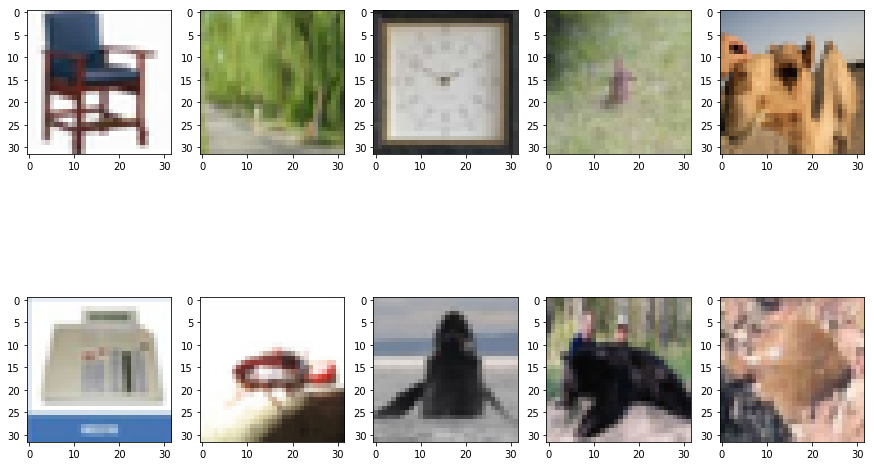

In [212]:
# sample images
plt.figure(figsize=(15,15))

sampleimages = df101train['Image Array'][600:610]

columns = 5
for i, image in enumerate(sampleimages):
    plt.subplot(len(sampleimages) / columns + 1, columns, i + 1)
    
    plt.imshow(image)
    

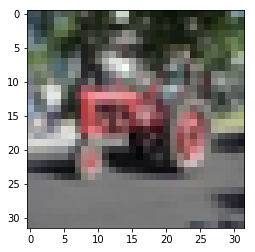

In [257]:
sampleimage = df101train['Image Array'][727]
plt.imshow(sampleimage)

(32, 32)
uint8


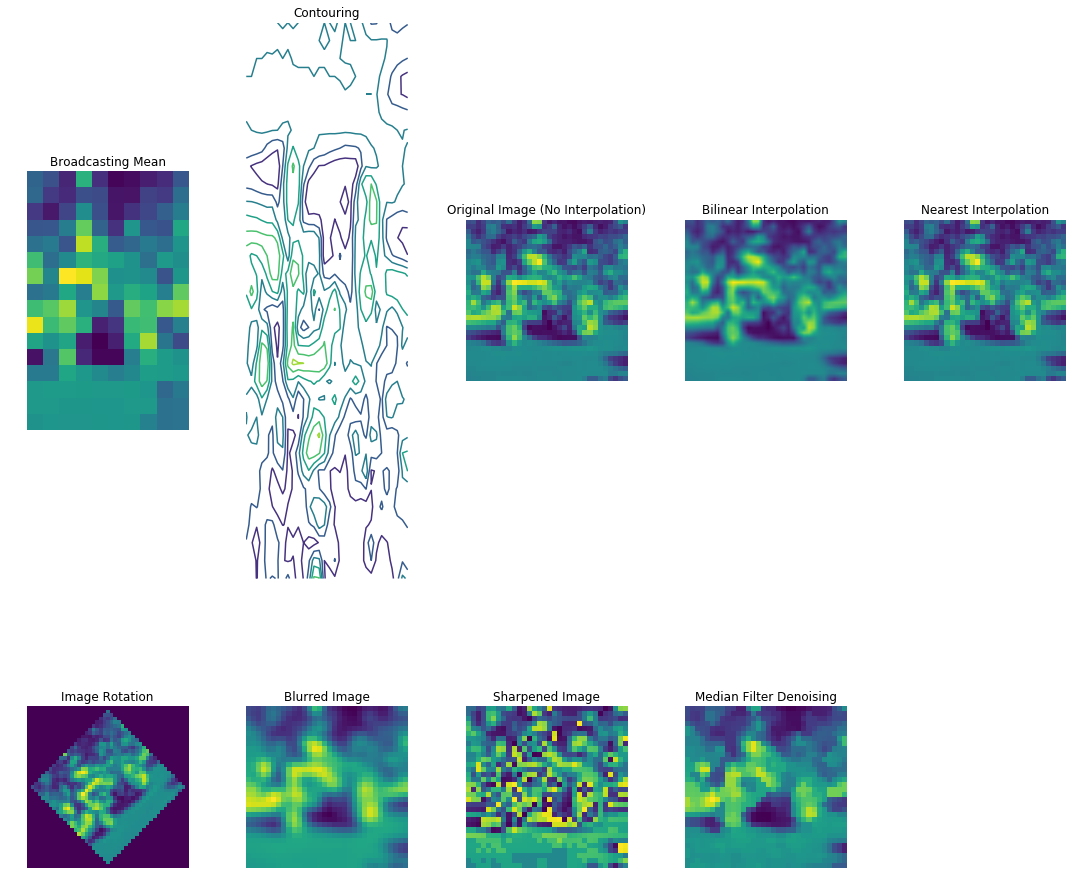

In [300]:
# sample manipulations of same image
from scipy import misc, ndimage
from scipy.misc import face
from skimage import filters

plt.figure(figsize=(15,15))

sampleimage = df101train['Image Array'][727] # random example
sampleimage2d = sampleimage[:,:,0]


print(sampleimage2d.shape)
print(sampleimage2d.dtype)


#------------------------------------------------------------------

plt.subplot(2,5,1)
sx, sy = sampleimage2d.shape
X, Y = np.ogrid[0:sx, 0:sy]
regions = sy//3 * (X//2) + Y//3
block_mean = ndimage.mean(sampleimage2d, labels=regions,
                              index=np.arange(1, regions.max() +1))
block_mean.shape = (sx//2, sy//3)
plt.imshow(block_mean)
plt.title('Broadcasting Mean')
plt.axis('off')

#------------------------------------------------------------------

contour = np.sin(sampleimage2d[0])*np.cos(sampleimage2d[1])

plt.subplot(2,5,2)
plt.contour(sampleimage2d)
plt.title('Contouring')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,3)
plt.imshow(sampleimage2d)
plt.title('Original Image (No Interpolation)')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,4)
plt.imshow(sampleimage2d, interpolation='bilinear')
plt.title('Bilinear Interpolation')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,5)
plt.imshow(sampleimage2d, interpolation='nearest')
plt.title('Nearest Interpolation')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,6)
plt.imshow(ndimage.rotate(sampleimage2d, 45))
plt.title('Image Rotation')
plt.axis('off')

#------------------------------------------------------------------

blurred_image = ndimage.gaussian_filter(sampleimage2d, sigma=1)
blurred_filtered_image = ndimage.gaussian_filter(blurred_image, sigma=0.5)
sharpened_image = blurred_image + 30 * (blurred_image - blurred_filtered_image)

plt.subplot(2,5,7)
plt.imshow(blurred_image)
plt.title('Blurred Image')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,8)
plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.axis('off')

#------------------------------------------------------------------

plt.subplot(2,5,9)
noisy = sampleimage2d + 0.4*sampleimage2d.std()*np.random.random(sampleimage2d.shape)
med_denoised = ndimage.median_filter(noisy, 3)

plt.imshow(med_denoised)
plt.title('Median Filter Denoising')
plt.axis('off')

#------------------------------------------------------------------
#plt.subplot(2,5,10)
#im = np.zeros(sampleimage2d.shape)
#im[64:-64, 64:-64] = 1
#sx = ndimage.sobel(sampleimage2d, axis=0, mode='constant')
#sy = ndimage.sobel(sampleimage2d, axis=1, mode='constant')
#sob = np.hypot(sx, sy)

#plt.imshow(sob)
#plt.title('Sobel filter')
#plt.axis('off')

#------------------------------------------------------------------

plt.tight_layout()
plt.show()

C:\Anaconda\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


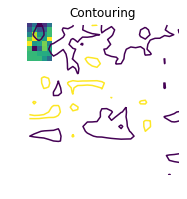

In [266]:

plt.subplot(1,2,2)
sx, sy = sampleimage2d.shape
X, Y = np.ogrid[0:sx, 0:sy]
regions = sy//6 * (X//4) + Y//6
block_mean = ndimage.mean(sampleimage2d, labels=regions,
                          index=np.arange(1, regions.max() +1))
block_mean.shape = (sx//4, sy//6)
plt.imshow(block_mean)
plt.title('Broadcasting Mean of the Blocks of Image')
plt.axis('off')

#------------------------------------------------------------------
plt.subplot(1,2,2)
plt.contour(sampleimage2d, [50,200])
plt.title('Contouring')
plt.axis('off')

plt.show()

In [ ]:
# sample manipulations of same image
from scipy import misc, ndimage
from scipy.misc import face
from skimage import filters

plt.figure(figsize=(5,5))

sampleimage = df101train['Image Array'][727] # random example
sampleimage2d = sampleimage[:,:,0]


print(sampleimage2d.shape)
print(sampleimage2d.dtype)



#------------------------------------------------------------------

def pltbroad():
    sx, sy = sampleimage2d.shape
    X, Y = np.ogrid[0:sx, 0:sy]
    regions = sy//6 * (X//4) + Y//6
    block_mean = ndimage.mean(sampleimage2d, labels=regions,
                              index=np.arange(1, regions.max() +1))
    block_mean.shape = (sx//4, sy//6)
    plt.imshow(block_mean)
    plt.title('Broadcasting Mean of the Blocks of Image')
    plt.axis('off')

#------------------------------------------------------------------

def pltcontour():
    plt.contour(sampleimage2d, [50,200])
    plt.title('Contouring')
    plt.axis('off')

#------------------------------------------------------------------

def no_interp():
    plt.imshow(sampleimage2d[500:620])
    plt.title('Fewer Pixels with No Interpolation')
    plt.axis('off')

#------------------------------------------------------------------

def bilinear_interp():
    plt.imshow(sampleimage2d[500:620], interpolation='bilinear')
    plt.title('Bilinear Interpolation')
    plt.axis('off')

#------------------------------------------------------------------

def nearest_interp():
    plt.imshow(sampleimage2d[500:620], interpolation='nearest')
    plt.title('Nearest Interpolation')
    plt.axis('off')

#------------------------------------------------------------------

def image_rotation():
    plt.imshow(ndimage.rotate(sampleimage2d, 45))
    plt.title('Image Rotation')
    plt.axis('off')

#------------------------------------------------------------------

blurred_image = ndimage.gaussian_filter(sampleimage2d, sigma=5)
blurred_filtered_image = ndimage.gaussian_filter(blurred_image, sigma=1)
sharpened_image = blurred_image + 30 * (blurred_image - blurred_filtered_image)

def image_blur():
    plt.imshow(blurred_image)
    plt.title('Blurred Image')
    plt.axis('off')

#------------------------------------------------------------------

def sharpen_image():
    plt.imshow(sharpened_image)
    plt.title('Sharpened Image')
    plt.axis('off')

#------------------------------------------------------------------

noisy = sampleimage2d + 0.4*sampleimage2d.std()*np.random.random(sampleimage2d.shape)
med_denoised = ndimage.median_filter(noisy, 3)
def denoising():
    plt.imshow(med_denoised)
    plt.title('Median Filter Denoising')
    plt.axis('off')

#------------------------------------------------------------------

sx = ndimage.sobel(sampleimage2d, axis=0, mode='constant')
sy = ndimage.sobel(sampleimage2d, axis=1, mode='constant')

def sobel():
    sob = np.hypot(sx, sy)
    plt.imshow(sob)
    plt.title('Sobel filter')
    plt.axis('off')

#------------------------------------------------------------------

graphingfunctions = [pltbroad(), pltcontour(), no_interp(), bilinear_interp(),
                    nearest_interp(), image_rotation(), image_blur(), sharpen_image(),
                    denoising(), sobel()]

columns = 5
for i, do_function in enumerate(graphingfunctions):
    plt.subplot(len(graphingfunctions) / columns + 1, columns, i + 1)
    do_function

plt.tight_layout()
plt.show()

In [ ]:
https://www.analyticsvidhya.com/blog/2018/03/comprehensive-collection-deep-learning-datasets/
    
    sklearn MLP (deep feed-forward)
    convolutional 
    recurrent
    
    https://www.kaggle.com/hamishdickson/preprocessing-images-with-dimensionality-reduction
    
    
    https://idyll.pub/post/dimensionality-reduction-293e465c2a3443e8941b016d/
    
    # you need to do unsupervised learning ---- look under the "clustering"
    # section to see clustering of images, and sampling the clustering
    #spectral clustering is good for image clustering as well....
    
    https://www.datacamp.com/community/tutorials/machine-learning-python
    
# Import matplotlib
import matplotlib.pyplot as plt

# Assign the predicted values to `predicted`
predicted = svc_model.predict(X_test)

# Zip together the `images_test` and `predicted` values in `images_and_predictions`
images_and_predictions = list(zip(images_test, predicted))

# For the first 4 elements in `images_and_predictions`
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    # Initialize subplots in a grid of 1 by 4 at positions i+1
    plt.subplot(1, 4, index + 1)
    # Don't show axes
    plt.axis('off')
    # Display images in all subplots in the grid
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    # Add a title to the plot
    plt.title('Predicted: ' + str(prediction))

# Show the plot
plt.show()

In [ ]:
# more visualization - look into: isomap, lle, t-sne, kernel_PCA


# Import `Isomap()`
from sklearn.manifold import Isomap

# Create an isomap and fit the `digits` data to it
X_iso = Isomap(n_neighbors=10).fit_transform(X_train)

# Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train)

# Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

# Add scatterplots to the subplots 
ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=y_train)
ax[1].set_title('Actual Training Labels')

# Show the plots
plt.show()

https://github.com/CShorten/KaggleDogBreedChallenge/blob/master/DogBreed_BinaryClassification.ipynb